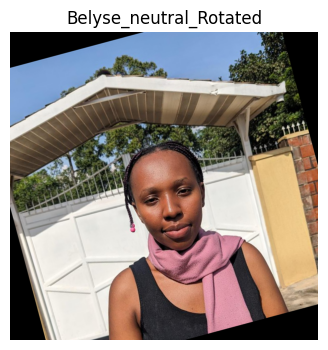

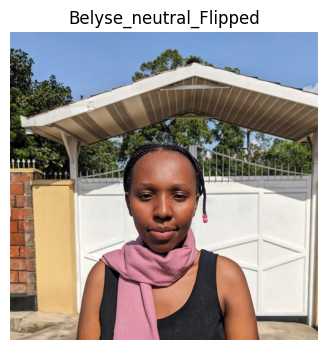

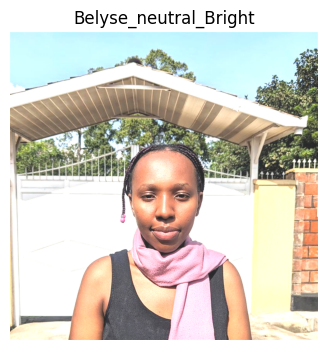

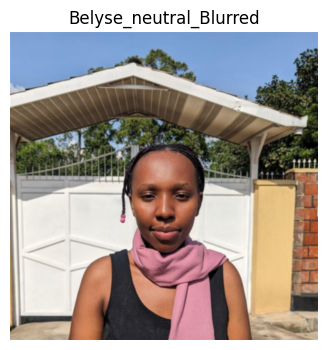

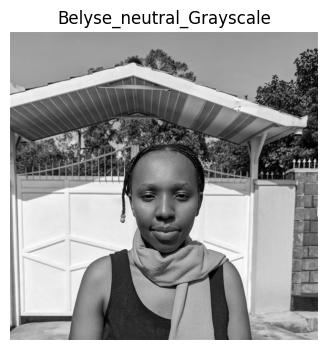

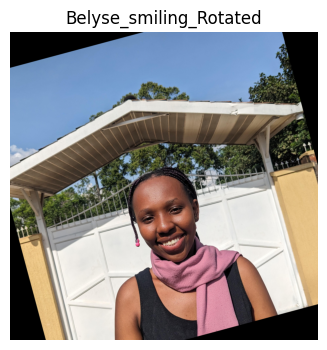

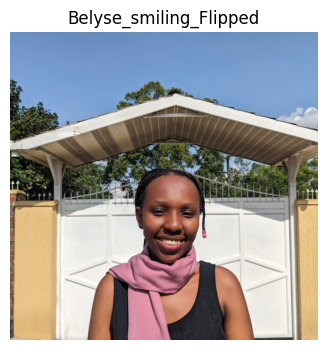

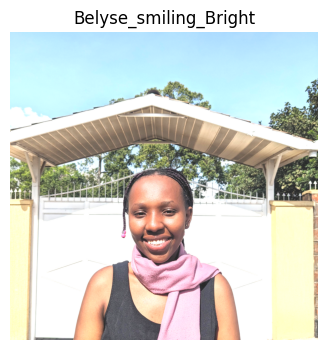

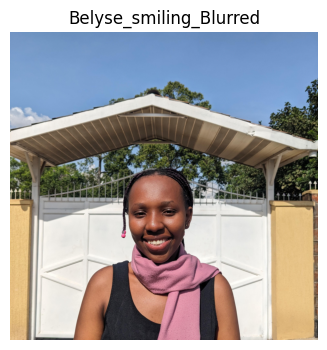

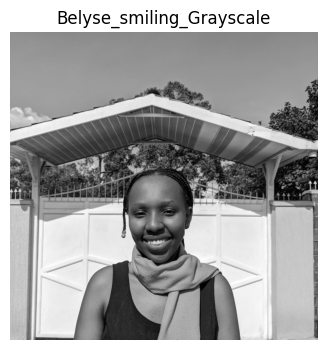

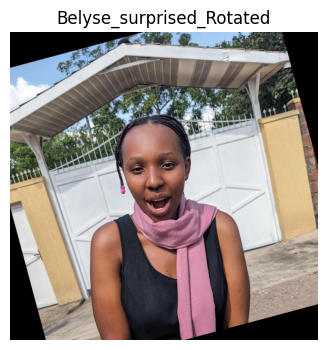

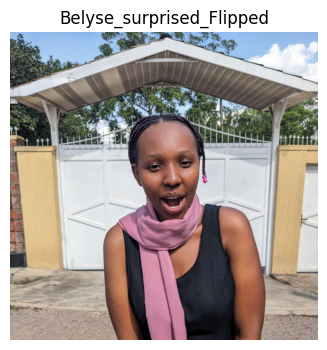

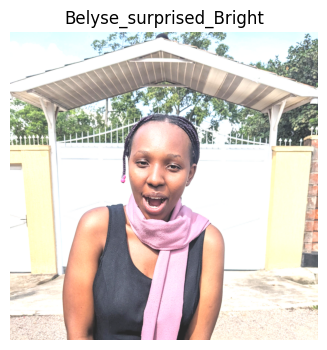

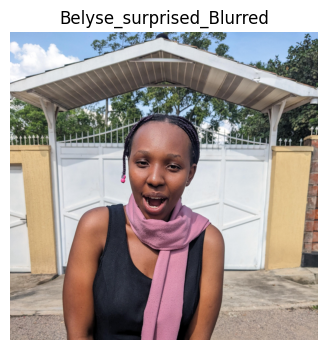

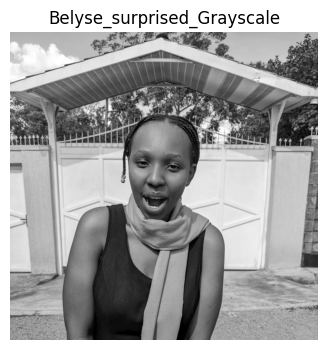

Saved: Belyse_neutral_Rotated.jpg
Saved: Belyse_neutral_Flipped.jpg
Saved: Belyse_neutral_Bright.jpg
Saved: Belyse_neutral_Blurred.jpg
Saved: Belyse_neutral_Grayscale.jpg
Saved: Belyse_smiling_Rotated.jpg
Saved: Belyse_smiling_Flipped.jpg
Saved: Belyse_smiling_Bright.jpg
Saved: Belyse_smiling_Blurred.jpg
Saved: Belyse_smiling_Grayscale.jpg
Saved: Belyse_surprised_Rotated.jpg
Saved: Belyse_surprised_Flipped.jpg
Saved: Belyse_surprised_Bright.jpg
Saved: Belyse_surprised_Blurred.jpg
Saved: Belyse_surprised_Grayscale.jpg
Features saved to: image_features.csv


In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


# Define paths

image_paths = [
    "/home/belysetag/Documents/Formative-2-Data-Preprocessing/data/image_data/belyse/neutral.jpeg",
    "/home/belysetag/Documents/Formative-2-Data-Preprocessing/data/image_data/belyse/smiling.jpeg",
    "/home/belysetag/Documents/Formative-2-Data-Preprocessing/data/image_data/belyse/surprised.jpeg"
]

output_dir = Path("/home/belysetag/Documents/Formative-2-Data-Preprocessing/data_processed/processed_image_files")
output_dir.mkdir(parents=True, exist_ok=True)

 
# Image Augmentation
 
augmented_images = []

for path in image_paths:
    basename = os.path.splitext(os.path.basename(path))[0]
    img = cv2.imread(path)

    # Augmentation 1: Rotation
    (h, w) = img.shape[:2]
    M = cv2.getRotationMatrix2D((w // 2, h // 2), 15, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    augmented_images.append((rotated, f"Belyse_{basename}_Rotated"))

    # Augmentation 2: Horizontal Flip
    flipped = cv2.flip(img, 1)
    augmented_images.append((flipped, f"Belyse_{basename}_Flipped"))

    # Augmentation 3: Brightness Adjustment
    bright = cv2.convertScaleAbs(img, alpha=1.3, beta=40)
    augmented_images.append((bright, f"Belyse_{basename}_Bright"))

    # Augmentation 4: Gaussian Blur
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    augmented_images.append((blurred, f"Belyse_{basename}_Blurred"))
    # Augmentation 5: Grayscale Conversion
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    augmented_images.append((grayscale, f"Belyse_{basename}_Grayscale"))
    #


# Visualization

for aug_img, aug_type in augmented_images:
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
    plt.title(aug_type)
    plt.axis("off")
    plt.show()

 
# Save Augmented Images (Filename only)
 
for i, (aug_img, aug_type) in enumerate(augmented_images):
    output_path = output_dir / f"{aug_type.replace(' ', '_')}.jpg"
    cv2.imwrite(str(output_path), aug_img)
    print(f"Saved: {output_path.name}")


# Feature Extraction & CSV Export

feature_list = []

for aug_img, aug_type in augmented_images:
    # Convert to RGB for feature extraction
    img_rgb = cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB)

    # Compute color histogram (as image features)
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # Normalize and flatten histograms
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()

    # Compute mean and std for each channel
    features = {
        "Augmentation": aug_type,
        "Red_Mean": np.mean(hist_r),
        "Green_Mean": np.mean(hist_g),
        "Blue_Mean": np.mean(hist_b),
        "Red_STD": np.std(hist_r),
        "Green_STD": np.std(hist_g),
        "Blue_STD": np.std(hist_b)
    }

    feature_list.append(features)

# Save features to CSV
df = pd.DataFrame(feature_list)
output_csv = Path("/home/belysetag/Documents/Formative-2-Data-Preprocessing/data_processed/image/image_features.csv")
output_csv.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(output_csv, index=False)
print(f"Features saved to: {output_csv.name}")
